In [2]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from scipy import stats
import datetime
import sys
from io import StringIO
import statsmodels.api as sm
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

In [3]:
df = pd.read_excel('Final_XLS.xlsx')
# df = pd.read_csv('cardio_train.csv')

In [4]:
print(df)
"""
Unnamed:0 here is the index. Delete or not to delete will be determined in the future.

"""
#ap_hi Systolic
#ap_lo Diastolic

       Unnamed: 0    age  height  weight  ap_hi  ap_lo  cholesterol    BMI  \
0               0  18393     168    62.0    110     80            1  21.97   
1               1  20228     156    85.0    140     90            3  34.93   
2               2  18857     165    64.0    130     70            3  23.51   
3               3  17623     169    82.0    150    100            1  28.71   
4               4  17474     156    56.0    100     60            1  23.01   
...           ...    ...     ...     ...    ...    ...          ...    ...   
69995       69995  19240     168    76.0    120     80            1  26.93   
69996       69996  22601     158   126.0    140     90            2  50.47   
69997       69997  19066     183   105.0    180     90            3  31.35   
69998       69998  22431     163    72.0    135     80            1  27.10   
69999       69999  20540     170    72.0    120     80            2  24.91   

       gluc  smoke  alco  active  gender_2  gender_1  cardio  


'\nUnnamed:0 here is the index. Delete or not to delete will be determined in the future.\n\n'

In [5]:
# print(hot_df)
'''
age is in days. we need to change that
'''
df = df.loc[df.BMI < 100]

In [6]:
df['days'] = df['age']
df['age'] = round(df['days']/365, 0)


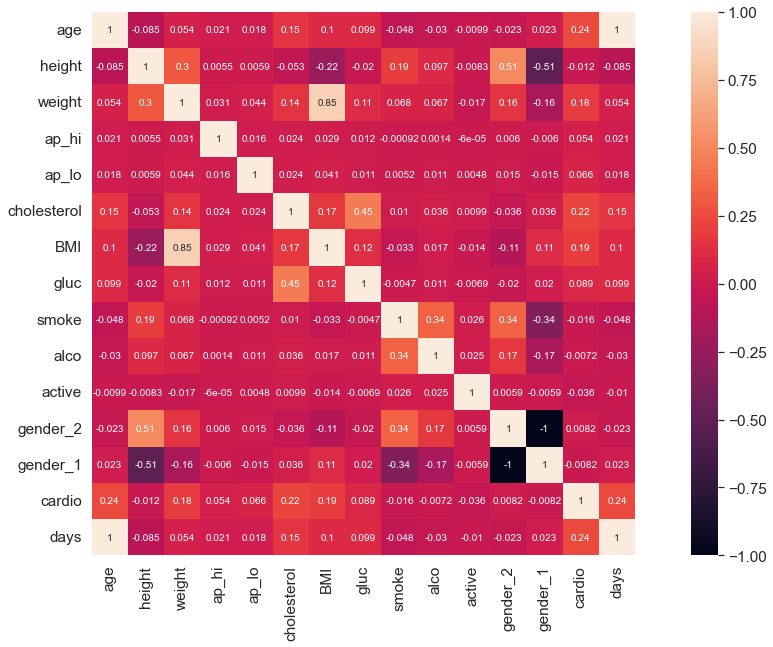

In [7]:
def make_a_corr(df):
    candidates = [col for col in df.columns if col!= 'Unnamed: 0']
    curry = df[candidates].corr()
    sns.set(font_scale = 1.4)
    sns.heatmap(curry, square = True, annot = True, annot_kws={'size':10})
    # print(candidates)

make_a_corr(df)


In [8]:
mon = df[['cardio', 'age', 'cholesterol', 'weight', 'BMI']].corr()
mon

,cardio,age,cholesterol,weight,BMI
cardio,1.000000,0.237768,0.221167,0.181805,0.189964
age,0.237768,1.000000,0.154408,0.054084,0.100383
cholesterol,0.221167,0.154408,1.000000,0.142029,0.169717
weight,0.181805,0.054084,0.142029,1.000000,0.853587
BMI,0.189964,0.100383,0.169717,0.853587,1.000000


In [9]:
'''avg BMI of ppl with cardio '''
bmis_avg = []
def avg_of_BMI(df, gender):
    if gender == 'male':
        result =  df.loc[df.gender_2 == 1].loc[df.cardio == 1].BMI.mean()
        bmis_avg.append(round(result, 2))
        return result
    elif gender == 'female':
        result = df.loc[df.gender_1 == 1].loc[df.cardio == 1].BMI.mean()
        bmis_avg.append(round(result, 2))
        return result
    else:
        result = df.loc[df.cardio == 1].BMI.mean()
        bmis_avg.append(round(result, 2))
        return result

print('Average BMI of Men: ',round(avg_of_BMI(df, 'male'), 2))
print('Average BMI of Women: ', round(avg_of_BMI(df, 'female'), 2))
print('Average BMI of Total: ', round(avg_of_BMI(df, 'mmmm'), 2))
print(bmis_avg)


Average BMI of Men:  27.56
Average BMI of Women:  29.03
Average BMI of Total:  28.51
[27.56, 29.03, 28.51]


In [10]:
###avg age with cardio disease

def avg_of_age(df, gender):
    if gender == 'male':
        return df.loc[df.gender_2 == 1].loc[df.cardio == 1].age.mean()
    elif gender == 'female':
        return df.loc[df.gender_1 == 1].loc[df.cardio == 1].age.mean()
    else:
        return df.loc[df.cardio == 1].age.mean()

print('Average age of Men: ',round(avg_of_age(df, 'male'), 0))
print('Average age of Women: ', round(avg_of_age(df, 'female'), 0))
print('Average ageof Total: ', round(avg_of_age(df, 'mmmm'), 0))

Average age of Men:  55.0
Average age of Women:  55.0
Average ageof Total:  55.0


In [11]:
def min_of_age(df, gender):
    if gender == 'male':
        return df.loc[df.gender_2 == 1].loc[df.cardio == 1].age.min()
    elif gender == 'female':
        return df.loc[df.gender_1 == 1].loc[df.cardio == 1].age.min()
    else:
        return df.loc[df.cardio == 1].age.min()

print('Min age of Men: ',round(min_of_age(df, 'male'), 0))
print('Min age of Women: ', round(min_of_age(df, 'female'), 0))
print('Min age of Total: ', round(min_of_age(df, 'mmmm'), 0))

Min age of Men:  39.0
Min age of Women:  39.0
Min age of Total:  39.0


In [12]:
#who's most likely to get cardioviscular. Men or Women?

mmmm = df.loc[df.gender_2 == 1] #Men
wwww = df.loc[df.gender_1 == 1] # Women

len_m = len(mmmm)
len_w = len(wwww)

ommmm= mmmm.loc[df.cardio == 1]
owwww = wwww.loc[df.cardio == 1]

len_om = len(ommmm)
len_ow = len(owwww)

res_m = len_om/len_m * 100
res_w = len_ow/len_w * 100

print(res_m, res_w)
'''Men are most likely to get cardioviscular disease'''

50.5294141694943 49.67259942869699


'Men are most likely to get cardioviscular disease'

In [13]:
#Systolic and Diastolic
#ap_hi Systolic
#ap_lo Diastolic
def difference_blood(df):
    mmm = df.ap_hi - df.ap_lo
    return mmm.mean()

print('Average difference', round(difference_blood(df), 0))

Average difference 32.0


In [14]:
print('For Men: ', round(difference_blood(df.loc[df.gender_2 == 1])))
print('For Women: ', round(difference_blood(df.loc[df.gender_1 == 1])))

For Men:  30
For Women:  34


In [22]:
def dif_blood_age_groups_cardio(df):
    df = df.loc[df.cardio == 1]
    mini = int(df['age'].min())
    # print(mini)
    if(mini % 10 != 0):
        mini = int(mini - (mini % 10))
    # print(mini)
    
    maxi = int(df['age'].max())
    # print(maxi)
    if(maxi % 10 != 0):
        maxi = int(maxi + (10 - (maxi % 10)))
    # print(maxi)
    results = []

    for i in range(mini, maxi, 10):
        # print(df.loc[df.age >= i].loc[df.age < i + 10 ])
        mm = difference_blood(df.loc[df.age >= i].loc[df.age < i + 10 ])
        results.append([round(mm,1),  str(i) + ' - ' + str(i+9)])
    return results

def separate_data(results):
    diffs = []
    ages = []
    for i in results:
        diffs.append(i[0])
        ages.append(i[1])
    return diffs, ages

print(dif_blood_age_groups_cardio(df))
# ddif, aages = separate_data(dif_blood_age_groups(df))
# plt.plot( aages, ddif)
'''There is a difference between difference gaps between blood pressures of each age group'''

[[1.5, 30], [33.3, 40], [24.5, 50], [31.4, 60]]


'There is a difference between difference gaps between blood pressures of each age group'

In [20]:
print('Men:',dif_blood_age_groups_cardio(df.loc[df.gender_2 == 1]))
print('Women:',dif_blood_age_groups_cardio(df.loc[df.gender_1 == 1]))

Men: [[0.0, 30], [35.1, 40], [20.3, 50], [30.4, 60]]
Women: [[2.6, 30], [32.1, 40], [26.6, 50], [31.9, 60]]


In [23]:
def avg_bmi_age_groups_cardio(df):
    df = df.loc[df.cardio == 1]
    mini = int(df['age'].min())
    # print(mini)
    if(mini % 10 != 0):
        mini = int(mini - (mini % 10))
    # print(mini)
    
    maxi = int(df['age'].max())
    # print(maxi)
    if(maxi % 10 != 0):
        maxi = int(maxi + (10 - (maxi % 10)))
    # print(maxi)
    results = []

    for i in range(mini, maxi, 10):
        # print(df.loc[df.age >= i].loc[df.age < i + 10 ])
        mm = df.loc[df.age >= i].loc[df.age < i + 10 ].BMI.mean()
        results.append([round(mm,1), str(i) + ' - ' + str(i+9)])
    return results

avg_bmi_age_groups_cardio(df)

[[28.8, '30 - 39'], [28.3, '40 - 49'], [28.6, '50 - 59'], [28.6, '60 - 69']]

In [24]:
print('Men:',avg_bmi_age_groups_cardio(df.loc[df.gender_2 == 1]))
print('Women:',avg_bmi_age_groups_cardio(df.loc[df.gender_1 == 1]))

Men: [[28.5, '30 - 39'], [27.6, '40 - 49'], [27.6, '50 - 59'], [27.4, '60 - 69']]
Women: [[29.1, '30 - 39'], [28.7, '40 - 49'], [29.0, '50 - 59'], [29.2, '60 - 69']]
